In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu

In [5]:
df = pd.read_csv('Ct.csv', sep='\t')
df.head()

,Sample,Ct GAPDH,Ct PPARg
0,Contr Ad d7 N1,20.445820,28.221760
1,Contr Ad d7 N2,20.487555,27.963959
2,Contr Ad d7 N3,20.628016,28.294661
3,Contr Ad d7 N4,20.961941,28.122202
4,V7 Ad d7 N1,20.738089,30.214193


In [10]:
df['delta_Ct'] = df['Ct PPARg'] - df['Ct GAPDH']
df['delta_delta_CT'] = df['delta_Ct'] - min(df['delta_Ct'])
df['effective'] = 2 ** -(df['delta_delta_CT'])
df['effective'] /= df[:4]['effective'].mean()

In [16]:
df

,Sample,Ct GAPDH,Ct PPARg,delta_Ct,delta_delta_CT,effective
0,Contr Ad d7 N1,20.445820,28.221760,7.775940,0.615679,0.826151
1,Contr Ad d7 N2,20.487555,27.963959,7.476404,0.316143,1.016784
2,Contr Ad d7 N3,20.628016,28.294661,7.666645,0.506384,0.891170
3,Contr Ad d7 N4,20.961941,28.122202,7.160261,0.000000,1.265894
4,V7 Ad d7 N1,20.738089,30.214193,9.476105,2.315844,0.254249
5,V7 Ad d7 N2,20.328524,29.771498,9.442974,2.282713,0.260155
6,V7 Ad d7 N3,20.714630,29.692842,8.978212,1.817951,0.359037
7,V7 Ad d7 N4,20.547922,29.464903,8.916981,1.756720,0.374604


In [19]:
df['Group'] = df['Sample'].apply(lambda x: 'Control' if x.startswith('Contr') else 'Target')

In [34]:
stat, p_value = mannwhitneyu(df[:4]['effective'], df[4:]['effective'], alternative='two-sided')

<Figure size 800x600 with 0 Axes>

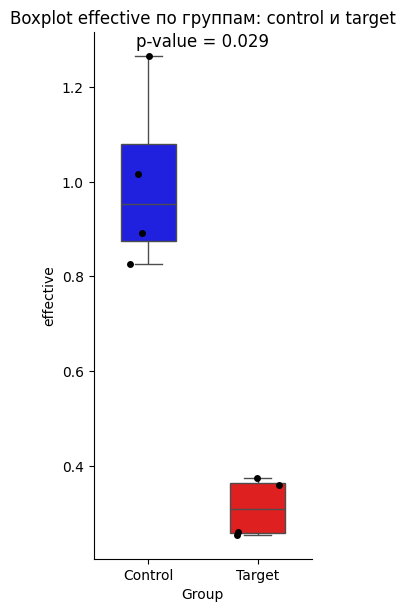

In [39]:
plt.figure(figsize=(8, 6))
sns.catplot(data=df, x='Group', y='effective', kind='box', height=6, aspect=0.5, width=0.5,
            palette={"Control": "blue", "Target": "red"}, hue='Group') 
sns.stripplot(data=df, x='Group', y='effective', color='black', jitter=0.2, size=5)
plt.text(0.5, max(df['effective']) + 0.02, f'p-value = {p_value:.3f}', ha='center', fontsize=12, color='black')
plt.title('Boxplot effective по группам: control и target')
plt.savefig("pic.png", dpi=300)
plt.show()